In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .getOrCreate()


In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
df_small = spark.read.csv("../data/2007_small.csv",header=True);
df_big = spark.read.csv("../data/2007.csv",header=True);

In [61]:
df_small = df_small \
    .filter(df_small.ArrDelay != "NA") \
    .filter(df_small.DepTime != "NA") \
    .filter(df_small.CRSDepTime != "NA") \
    .filter(df_small.CRSArrTime != "NA") \
    .withColumn('ArrDelay_tmp', df_small.ArrDelay.cast('float')) \
    .drop('ArrDelay') \
    .withColumnRenamed('ArrDelay_tmp', 'ArrDelay') \
    .withColumn('DepDelay_tmp', df_small.DepDelay.cast('float')) \
    .drop('DepDelay') \
    .withColumnRenamed('DepDelay_tmp', 'DepDelay')

df_big = df_big \
    .filter(df_big.ArrDelay != "NA") \
    .filter(df_big.DepTime != "NA") \
    .filter(df_big.CRSDepTime != "NA") \
    .filter(df_big.CRSArrTime != "NA") \
    .withColumn('ArrDelay_tmp', df_big.ArrDelay.cast('float')) \
    .drop('ArrDelay') \
    .withColumnRenamed('ArrDelay_tmp', 'ArrDelay') \
    .withColumn('DepDelay_tmp', df_big.DepDelay.cast('float')) \
    .drop('DepDelay') \
    .withColumnRenamed('DepDelay_tmp', 'DepDelay')

In [41]:
df_small.createOrReplaceTempView("df_small")
df_big.createOrReplaceTempView("df_big")

In [27]:
ad = pd.to_numeric(df_big.select("ArrDelay").filter(df_big.ArrDelay != "NA").toPandas()['ArrDelay'])

{'whiskers': [<matplotlib.lines.Line2D at 0x115c7a518>,
 'caps': [<matplotlib.lines.Line2D at 0x115c7aba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x115c7a128>],
 'medians': [<matplotlib.lines.Line2D at 0x115c7afd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1181c65c0>],
 'means': []}

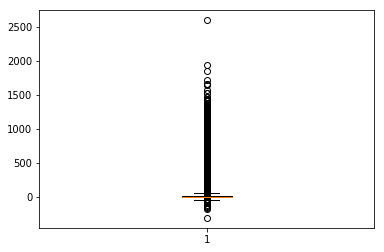

In [31]:
plt.boxplot(ad)

In [47]:
adg = spark.sql("select ArrDelay, count(*) from df_big where ArrDelay != 'NA' group by ArrDelay").toPandas()

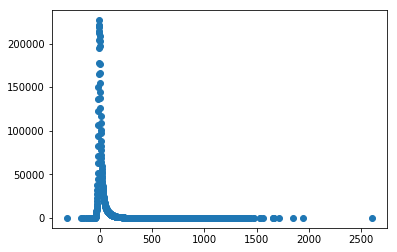

In [52]:
plt.scatter(pd.to_numeric(adg['ArrDelay']), adg['count(1)'])

In [55]:
print(np.mean(ad))
print(np.median(ad))

10.19218057072105
0.0


In [62]:
df_big.corr('DepDelay', 'ArrDelay')

0.9315028109819367